In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [2]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [4]:
kmeans = KMeans(n_clusters=10, random_state=128)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

[0 0 9 8 9 1 9 1 1 1 5 4 4 5 1 5 5 4 7 1 8 2 5 7 0 4 5 4 4 4 9 1 4 0 4 4 1
 8 1 1 1 8 9 1 1 9 2 1 8 1 8 1 8 4 5 8 0 5 8 2 2 2 5 2 1 5 2 8 2 8 0 2 9 1
 8 4 8 9 9 8 8 8 3 4 8 9 1 9 8 1 1 1 1 1 5 0 8 2 8 1 1 2 8 2 2 1 8 8 7 8 2
 8 1 2 2 8 2 5 4 4 8 9 7 1 8 1 1 9 1 9 8 5 4 5 9 8 8 8 5 2 2 4 8 8 2 8 8 1
 1 1 8 2 2 2 1 8 4 5 8 8 8 9 7 8 7 1 2 4 9 1 8 5 5 2 2 2 2 5 8 8 3 0 4 8 5
 2 4 8 8 8 1 8 2 1 1 8 1 4 9 5 8 4 7 5 8 5 2 4 8 5 9 8 3 5 1 1 8 2 0 7 1 1
 2 5 1 1 2 1 8 1 4 8 8 0 2 1 3 0 1 4 1 8 8 1 9 2 8 8 2 8 0 8 0 4 0 1 0 5 4
 5 0 4 4 5 4 3 2 1 8 2 1 8 7 2 4 8 8 4 1 1 9 8 9 5 8 8 8 8 2 8 1 1 8 8 8 1
 2 8 1 2 0 8 9 2 8 8 8 2 1 1 8 1 8 8 2 8 8 9 2 8 2 9 8 0 8 8 1 8 5 5 5 8 2
 8 8 4 8 0 2 3 1 2 2 9 8 2 8 5 8 8 8 5 3 5 8 8 8 1 2 2 8 8 8 5 1 0 9 8 3 7
 4 1 9 0 1 5 2 1 1 8 8 2 8 8 8 1 8 1 8 4 2 2 4 7 8 1 1 8 8 8 4 8 8 8 8 8 5
 8 4 8 8 8 2 5 5 8 2 9 8 8 8 1 8 1 2 2 2 8 2 8 1 8 9 9 1 1 8 1 1 1 8 4 1 2
 4 8 4 1 1 0 8 9 8 1 8 1 8 8 8 2 9 6 1 8 1 1 1 2 4 8 2 8 5 8 2 8 1 1 8 5 8
 1 1 1 5 8 1 9 8 5 8 4 4 

In [5]:
 kmeans.cluster_centers_.shape

(10, 30)

In [6]:
print(kmeans.cluster_centers_)

[[1.99319231e+01 2.20330769e+01 1.31950000e+02 1.23710000e+03
  1.01086538e-01 1.57223846e-01 1.83885000e-01 1.03358077e-01
  1.92600000e-01 6.12934615e-02 7.24403846e-01 1.02957308e+00
  5.06257692e+00 9.20784615e+01 5.94592308e-03 3.09096154e-02
  4.11569231e-02 1.49783846e-02 1.77303846e-02 3.86411538e-03
  2.50984615e+01 2.94969231e+01 1.67723077e+02 1.92269231e+03
  1.43569231e-01 4.08057692e-01 4.97996154e-01 2.08269231e-01
  3.22396154e-01 9.20384615e-02]
 [1.39387395e+01 1.90294958e+01 9.04831933e+01 6.00262185e+02
  9.39314286e-02 1.00406387e-01 7.45220756e-02 4.14941345e-02
  1.75155462e-01 6.16680672e-02 3.13209244e-01 1.08587899e+00
  2.26420084e+00 2.71161345e+01 5.84906723e-03 2.42642689e-02
  2.82606723e-02 1.11375714e-02 1.78284202e-02 3.49648571e-03
  1.57033613e+01 2.55010924e+01 1.03702605e+02 7.57455462e+02
  1.28325294e-01 2.62771765e-01 2.65218908e-01 1.12402101e-01
  2.83356303e-01 8.43820168e-02]
 [9.87515385e+00 1.78310989e+01 6.31275824e+01 2.99732967e+02
  9.

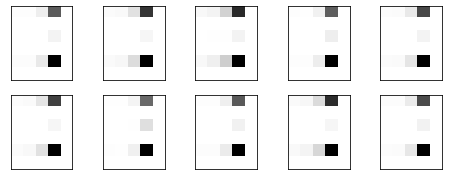

In [7]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [10]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9068541300527241

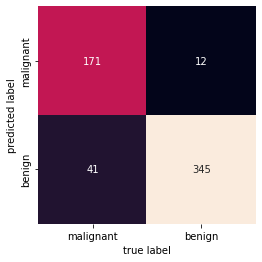

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');